In [1]:
!sudo apt-get purge --yes openjdk-\* icedtea-\* icedtea6-\*
!sudo apt install --yes openjdk-8-jre-headless
!pip3 install pyspark --user
!pip3 install findspark --user
!pip3 install py4j --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'openjdk-9-jre-headless' for glob 'openjdk-*'
Note, selecting 'openjdk-8-jdk' for glob 'openjdk-*'
Note, selecting 'openjdk-8-jre' for glob 'openjdk-*'
Note, selecting 'openjdk-6-jdk' for glob 'openjdk-*'
Note, selecting 'openjdk-6-jre' for glob 'openjdk-*'
Note, selecting 'openjdk-9-demo' for glob 'openjdk-*'
Note, selecting 'openjdk-6-jre-headless' for glob 'openjdk-*'
Note, selecting 'openjdk-8-demo' for glob 'openjdk-*'
Note, selecting 'openjdk-8-jre-dcevm' for glob 'openjdk-*'
Note, selecting 'openjdk-8-jdk-headless' for glob 'openjdk-*'
Note, selecting 'openjdk-9-dbg' for glob 'openjdk-*'
Note, selecting 'openjdk-7-jre-headless' for glob 'openjdk-*'
Note, selecting 'openjdk-9-doc' for glob 'openjdk-*'
Note, selecting 'openjdk-8-jre-zero' for glob 'openjdk-*'
Note, selecting 'openjdk-8-source' for glob 'openjdk-*'
Note, selecting 'openjdk-jre' for glob 'openjdk-*'
Note, 

7Progress: [ 18%] [###########...............................................] 87Progress: [ 27%] [################..........................................] 8Selecting previously unselected package ca-certificates-java.
Preparing to unpack .../ca-certificates-java_20160321ubuntu1_all.deb ...
7Progress: [ 36%] [######################....................................] 8Unpacking ca-certificates-java (20160321ubuntu1) ...
7Progress: [ 45%] [###########################...............................] 87Progress: [ 54%] [################################..........................] 8Processing triggers for ca-certificates (20170717~16.04.1) ...
Updating certificates in /etc/ssl/certs...
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...
done.
Setting up ca-certificates-java (20160321ubuntu1) ...
7Progress: [ 63%] [#####################################.....................] 8Adding debian:AddTrust_Low-Value_Services_Root.pem
Adding debian:Starfield_Ser

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/lib/jexec to provide /usr/bin/jexec (jexec) in auto mode
7Progress: [ 81%] [################################################..........] 8Processing triggers for ca-certificates (20170717~16.04.1) ...
7Progress: [ 90%] [#####################################################.....] 8Updating certificates in /etc/ssl/certs...
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...

done.
done.

78Requirement already satisfied: pyspark in ./.local/lib/python3.5/site-packages (2.4.4)


In [2]:
!pip3 install seaborn --user
        

In [3]:
!pip3 install pyspark --user


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
## spark imports
from pyspark.sql import Row, SparkSession
from pyspark.sql.functions import *
from pyspark import SQLContext, SparkConf, SparkContext
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [6]:
%matplotlib inline

In [7]:
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession

spark = SparkSession \
        .builder \
        .appName("i4_v3") \
        .getOrCreate()

sql_context = SQLContext(sparkContext=spark.sparkContext)

In [8]:
file1 = spark.read.csv('PhysicalActivity.csv', header=True)
file3=sql_context.read.csv('PhysicalActivity.csv',header = True, inferSchema = True)

In [10]:
file3.show()

+---+-----+----+------+----------+-------+----+-------+------+--------------+------------------+---+----+----------+------------------+------------------------+-------------------+-----------------------+-----------------+-------------------+--------------------+----------------+
| Id|Steps|Peak|Cardio|Heart Rate|FatBurn|Mode|Minutes|Gender|TotalTimeInBed|TotalMinutesAsleep|Age| GPA|Life Score|VeryActiveDistance|ModeratelyActiveDistance|LightActiveDistance|SedentaryActiveDistance|VeryActiveMinutes|FairlyActiveMinutes|LightlyActiveMinutes|SedentaryMinutes|
+---+-----+----+------+----------+-------+----+-------+------+--------------+------------------+---+----+----------+------------------+------------------------+-------------------+-----------------------+-----------------+-------------------+--------------------+----------------+
|  1|11157|0.13|  3.86|        97| 111.92|   1|   9.35|     1|           346|               327| 23| 4.0|        48|       1.879999995|             0.5500000

In [11]:
file1.count()

569

In [12]:
file1.show()

+---+-----+----+------+----------+-------+----+-------+------+--------------+------------------+---+----+----------+------------------+------------------------+-------------------+-----------------------+-----------------+-------------------+--------------------+----------------+
| Id|Steps|Peak|Cardio|Heart Rate|FatBurn|Mode|Minutes|Gender|TotalTimeInBed|TotalMinutesAsleep|Age| GPA|Life Score|VeryActiveDistance|ModeratelyActiveDistance|LightActiveDistance|SedentaryActiveDistance|VeryActiveMinutes|FairlyActiveMinutes|LightlyActiveMinutes|SedentaryMinutes|
+---+-----+----+------+----------+-------+----+-------+------+--------------+------------------+---+----+----------+------------------+------------------------+-------------------+-----------------------+-----------------+-------------------+--------------------+----------------+
|  1|11157|0.13|  3.86|        97| 111.92|   1|   9.35|     1|           346|               327| 23|   4|        48|       1.879999995|             0.5500000

In [13]:
file1.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Steps: string (nullable = true)
 |-- Peak: string (nullable = true)
 |-- Cardio: string (nullable = true)
 |-- Heart Rate: string (nullable = true)
 |-- FatBurn: string (nullable = true)
 |-- Mode: string (nullable = true)
 |-- Minutes: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- TotalTimeInBed: string (nullable = true)
 |-- TotalMinutesAsleep: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- GPA: string (nullable = true)
 |-- Life Score: string (nullable = true)
 |-- VeryActiveDistance: string (nullable = true)
 |-- ModeratelyActiveDistance: string (nullable = true)
 |-- LightActiveDistance: string (nullable = true)
 |-- SedentaryActiveDistance: string (nullable = true)
 |-- VeryActiveMinutes: string (nullable = true)
 |-- FairlyActiveMinutes: string (nullable = true)
 |-- LightlyActiveMinutes: string (nullable = true)
 |-- SedentaryMinutes: string (nullable = true)



In [14]:
file1.show(n=3, truncate=False)

+---+-----+----+------+----------+-------+----+-------+------+--------------+------------------+---+----+----------+------------------+------------------------+-------------------+-----------------------+-----------------+-------------------+--------------------+----------------+
|Id |Steps|Peak|Cardio|Heart Rate|FatBurn|Mode|Minutes|Gender|TotalTimeInBed|TotalMinutesAsleep|Age|GPA |Life Score|VeryActiveDistance|ModeratelyActiveDistance|LightActiveDistance|SedentaryActiveDistance|VeryActiveMinutes|FairlyActiveMinutes|LightlyActiveMinutes|SedentaryMinutes|
+---+-----+----+------+----------+-------+----+-------+------+--------------+------------------+---+----+----------+------------------+------------------------+-------------------+-----------------------+-----------------+-------------------+--------------------+----------------+
|1  |11157|0.13|3.86  |97        |111.92 |1   |9.35   |1     |346           |327               |23 |4   |48        |1.879999995       |0.550000012           

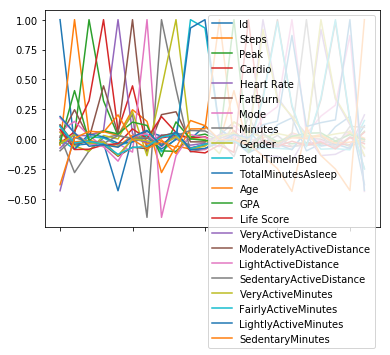

In [15]:
import pandas as pd
pddf = file1.limit(569)
pddf = pddf.toPandas()
pddf=pddf.astype(float)
corr = pddf.corr()
corr.plot()

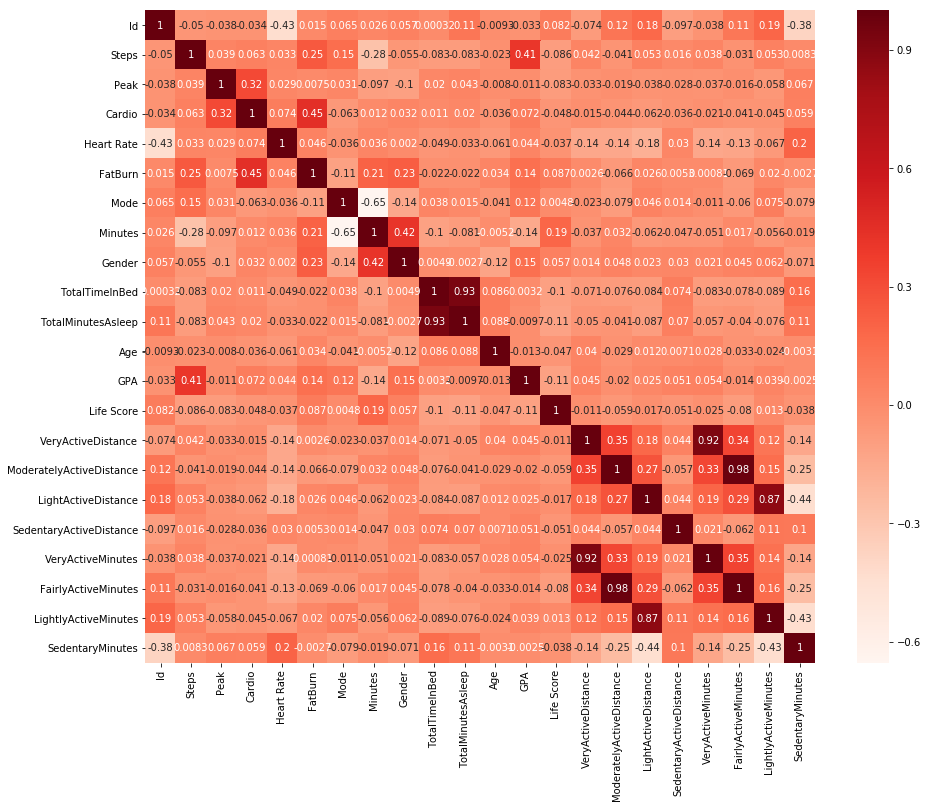

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
file1.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Id,569,285.0,164.40042579020286,1,99
Steps,563,10200.58969804618,3084.907375083962,0,9996
Peak,568,2.903204225352112,14.308391352050698,0,9.43
Cardio,566,9.09001766784452,16.66330441896143,0,9.95
Heart Rate,569,76.5360281195079,15.108382585082902,100,99
FatBurn,567,148.53504409171066,96.93112794827525,0,99.36
Mode,569,0.8541300527240774,0.35328636784398937,0,1
Minutes,566,10.184363957597169,3.1536076043426315,10,9.97
Gender,569,0.5957820738137083,0.49117184712733725,0,1


In [18]:
#check for rows with null values
import pyspark.sql.functions as f
from functools import reduce

file1.where(reduce(lambda x, y: x | y, (f.col(x).isNull() for x in file1.columns))).count()

165

In [19]:
#check for rows with duplicates
df = file1

if df.count() > df.dropDuplicates(df.columns).count():
  raise ValueError('Data has duplicates')
else:
  print("No duplicates")

No duplicates


In [9]:
pa=pd.read_csv("PhysicalActivity.csv")
pa.head(10)

,Id,Steps,Peak,Cardio,Heart Rate,FatBurn,Mode,Minutes,Gender,TotalTimeInBed,...,GPA,Life Score,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,1,11157.0,0.13,3.86,97,111.92,1,9.35,1,346.0,...,4.00,48,1.88,0.55,6.06,0.0,25,13,328,728
1,2,7986.0,2.72,15.53,102,249.29,1,8.20,1,407.0,...,3.26,101,1.57,0.69,4.71,0.0,21,19,217,776
2,3,11602.0,0.35,2.10,105,195.32,0,12.73,0,442.0,...,3.07,64,2.44,0.40,3.91,0.0,30,11,181,1218
3,4,10609.0,1.00,6.51,103,121.75,1,10.00,1,367.0,...,4.00,41,2.14,1.26,2.83,0.0,29,34,209,726
4,5,14552.0,9.10,6.09,101,109.66,1,8.63,0,712.0,...,2.87,83,2.71,0.41,5.04,0.0,36,10,221,773
5,6,8770.0,0.57,1.96,95,106.65,0,15.33,1,320.0,...,2.76,45,3.19,0.78,2.51,0.0,38,20,164,539
6,7,7138.0,0.13,2.10,91,55.45,1,9.82,1,377.0,...,2.86,74,3.25,0.64,4.71,0.0,42,16,233,1149
7,8,14676.0,0.55,4.30,93,130.03,1,8.57,1,364.0,...,3.76,67,3.53,1.32,5.03,0.0,50,31,264,775
8,9,10963.0,3.76,9.80,94,184.05,1,8.00,1,384.0,...,3.47,61,1.96,0.48,4.24,0.0,28,12,205,818
9,10,13510.0,0.17,13.59,93,65.14,1,7.38,1,449.0,...,3.82,51,1.34,0.35,4.65,0.0,19,8,211,838


In [21]:
pa.isnull()

,Id,Steps,Peak,Cardio,Heart Rate,FatBurn,Mode,Minutes,Gender,TotalTimeInBed,...,GPA,Life Score,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
pa.isnull().sum()

Id                            0
Steps                         6
Peak                          1
Cardio                        3
Heart Rate                    0
FatBurn                       2
Mode                          0
Minutes                       3
Gender                        0
TotalTimeInBed              156
TotalMinutesAsleep          156
Age                           0
GPA                           0
Life Score                    0
VeryActiveDistance            0
ModeratelyActiveDistance      0
LightActiveDistance           0
SedentaryActiveDistance       0
VeryActiveMinutes             0
FairlyActiveMinutes           0
LightlyActiveMinutes          0
SedentaryMinutes              0
dtype: int64

In [23]:
#check rows with null
import pyspark.sql.functions as f
from functools import reduce

file1.where(reduce(lambda x, y: x | y, (f.col(x).isNull() for x in file1.columns))).count()

165

In [24]:
#check for duplicates
df = file1

if df.count() > df.dropDuplicates(df.columns).count():
  raise ValueError('Data has duplicates')
else:
  print("No duplicates")

No duplicates


In [25]:
#drop rows with null values
df = file1.dropna()
print(df.count())
df.show()

404
+---+-----+----+------+----------+-------+----+-------+------+--------------+------------------+---+----+----------+------------------+------------------------+-------------------+-----------------------+-----------------+-------------------+--------------------+----------------+
| Id|Steps|Peak|Cardio|Heart Rate|FatBurn|Mode|Minutes|Gender|TotalTimeInBed|TotalMinutesAsleep|Age| GPA|Life Score|VeryActiveDistance|ModeratelyActiveDistance|LightActiveDistance|SedentaryActiveDistance|VeryActiveMinutes|FairlyActiveMinutes|LightlyActiveMinutes|SedentaryMinutes|
+---+-----+----+------+----------+-------+----+-------+------+--------------+------------------+---+----+----------+------------------+------------------------+-------------------+-----------------------+-----------------+-------------------+--------------------+----------------+
|  1|11157|0.13|  3.86|        97| 111.92|   1|   9.35|     1|           346|               327| 23|   4|        48|       1.879999995|             0.550

In [26]:
#check if all rows with null values are gone
df.where(reduce(lambda x, y: x | y, (f.col(x).isNull() for x in file1.columns))).count()

0

In [27]:
df.toPandas()

,Id,Steps,Peak,Cardio,Heart Rate,FatBurn,Mode,Minutes,Gender,TotalTimeInBed,...,GPA,Life Score,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,1,11157,0.13,3.86,97,111.92,1,9.35,1,346,...,4,48,1.879999995,0.550000012,6.059999943,0,25,13,328,728
1,2,7986,2.72,15.53,102,249.29,1,8.2,1,407,...,3.26,101,1.570000052,0.689999998,4.710000038,0,21,19,217,776
2,3,11602,0.35,2.1,105,195.32,0,12.73,0,442,...,3.07,64,2.440000057,0.400000006,3.910000086,0,30,11,181,1218
3,4,10609,1,6.51,103,121.75,1,10,1,367,...,4,41,2.140000105,1.25999999,2.829999924,0,29,34,209,726
4,5,14552,9.1,6.09,101,109.66,1,8.63,0,712,...,2.87,83,2.710000038,0.409999996,5.039999962,0,36,10,221,773
5,6,8770,0.57,1.96,95,106.65,0,15.33,1,320,...,2.76,45,3.190000057,0.779999971,2.50999999,0,38,20,164,539
6,7,7138,0.13,2.1,91,55.45,1,9.82,1,377,...,2.86,74,3.25,0.639999986,4.710000038,0,42,16,233,1149
7,8,14676,0.55,4.3,93,130.03,1,8.57,1,364,...,3.76,67,3.529999971,1.320000052,5.03000021,0,50,31,264,775
8,9,10963,3.76,9.8,94,184.05,1,8,1,384,...,3.47,61,1.960000038,0.479999989,4.239999771,0,28,12,205,818
9,10,13510,0.17,13.59,93,65.14,1,7.38,1,449,...,3.82,51,1.340000033,0.349999994,4.650000095,0,19,8,211,838


In [28]:
#spark_not_null_df['VeryActiveDistance'] = spark_not_null_df['VeryActiveDistance'].astype(float)

#spark_not_null_df = spark_not_null_df.apply(lambda x: spark_not_null_df.to_numeric(x, errors='ignore', downcast='float'))
#print (spark_not_null_df.dtypes)

#from pyspark.sql import types 
#for t in ['VeryActiveDistance', 'LightActiveDistance']:
#    print(f"{t}: {getattr(types, t)().simpleString()}")

In [29]:
pa=pd.read_csv("PhysicalActivity.csv")

print(pa.columns.values)

['Id' 'Steps' 'Peak' 'Cardio' 'Heart Rate' 'FatBurn' 'Mode' 'Minutes'
 'Gender' 'TotalTimeInBed' 'TotalMinutesAsleep' 'Age' 'GPA' 'Life Score'
 'VeryActiveDistance' 'ModeratelyActiveDistance' 'LightActiveDistance'
 'SedentaryActiveDistance' 'VeryActiveMinutes' 'FairlyActiveMinutes'
 'LightlyActiveMinutes' 'SedentaryMinutes']


In [30]:
pa.drop("ModeratelyActiveDistance", axis='columns', inplace=True)

In [31]:
pa.drop("VeryActiveDistance", axis='columns', inplace=True)

In [32]:
pa.drop("TotalMinutesAsleep", axis='columns', inplace=True)

In [33]:
pa.drop("SedentaryActiveDistance", axis='columns', inplace=True)

In [34]:
pa.drop("TotalTimeInBed", axis='columns', inplace=True)

In [35]:
pa.drop("Minutes", axis='columns', inplace=True)

In [36]:
pa.drop("Age", axis='columns', inplace=True)

In [37]:
pa.shape

(569, 15)

In [7]:
pa_final1 = pa.replace(np.nan, 0)

NameError: name 'pa' is not defined

In [39]:
pa_final1.isnull().sum()

Id                      0
Steps                   0
Peak                    0
Cardio                  0
Heart Rate              0
FatBurn                 0
Mode                    0
Gender                  0
GPA                     0
Life Score              0
LightActiveDistance     0
VeryActiveMinutes       0
FairlyActiveMinutes     0
LightlyActiveMinutes    0
SedentaryMinutes        0
dtype: int64

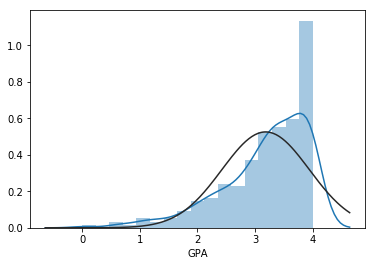

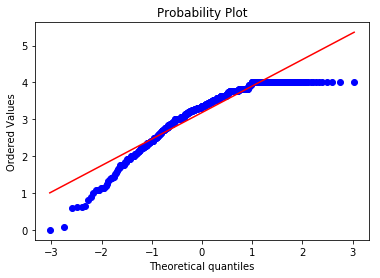

In [40]:
from scipy.stats import norm
from scipy import stats
import seaborn as sns
#normal probability and instagram plot
sns.distplot(pa_final1['GPA'],fit=norm);
fig=plt.figure()
res=stats.probplot(pa_final1['GPA'],plot=plt)
plt.show()


In [41]:
!pip3 install sklearn --user


In [42]:
checkgpa = df.filter(df['GPA'] != 0)
checkgpa.show()

+---+-----+----+------+----------+-------+----+-------+------+--------------+------------------+---+----+----------+------------------+------------------------+-------------------+-----------------------+-----------------+-------------------+--------------------+----------------+
| Id|Steps|Peak|Cardio|Heart Rate|FatBurn|Mode|Minutes|Gender|TotalTimeInBed|TotalMinutesAsleep|Age| GPA|Life Score|VeryActiveDistance|ModeratelyActiveDistance|LightActiveDistance|SedentaryActiveDistance|VeryActiveMinutes|FairlyActiveMinutes|LightlyActiveMinutes|SedentaryMinutes|
+---+-----+----+------+----------+-------+----+-------+------+--------------+------------------+---+----+----------+------------------+------------------------+-------------------+-----------------------+-----------------+-------------------+--------------------+----------------+
|  1|11157|0.13|  3.86|        97| 111.92|   1|   9.35|     1|           346|               327| 23|   4|        48|       1.879999995|             0.5500000

In [9]:
from pyspark import SQLContext, SparkConf, SparkContext
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator


In [10]:
file3=sql_context.read.csv('PhysicalActivity.csv',header = True, inferSchema = True)
data2 = file3.select(file3.GPA.alias('Steps'))
train, test = data2.randomSplit([0.7,0.3])
assembler = VectorAssembler().setInputCols(['Steps'])\
.setOutputCol('GPA')
train01 = assembler.transform(train)
train02 = train01.select("GPA","Steps")
train02.show(truncate=False)

+------+-----+
|GPA   |Steps|
+------+-----+
|[0.62]|0.62 |
|[0.66]|0.66 |
|[1.0] |1.0  |
|[1.07]|1.07 |
|[1.07]|1.07 |
|[1.13]|1.13 |
|[1.15]|1.15 |
|[1.15]|1.15 |
|[1.2] |1.2  |
|[1.33]|1.33 |
|[1.38]|1.38 |
|[1.43]|1.43 |
|[1.52]|1.52 |
|[1.54]|1.54 |
|[1.6] |1.6  |
|[1.66]|1.66 |
|[1.69]|1.69 |
|[1.71]|1.71 |
|[1.75]|1.75 |
|[1.76]|1.76 |
+------+-----+
only showing top 20 rows



In [11]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'GPA', labelCol="Steps", maxIter=20, regParam=0.1, elasticNetParam=0.9)

lr_model = lr.fit(train02)

print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.8639658285051762]
Intercept: 0.43403698936845964


In [ ]:
test_results = lr_model.evaluate(test)

# Interesting results! This shows the difference between the predicted value and the test data.
test_results.residuals.show()

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results.rootMeanSquaredError))

In [ ]:
pa.plot(kind='hist', x="Life Score", y=["GPA"])

In [ ]:
pa.plot(kind='hist', x="Steps", y=["Life Score"])

In [ ]:
df1 = pa.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
sns.pairplot(pa)
